In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
cluster_data = pd.read_csv('Data_2009_2019.csv')  #Read csv
cluster_data = cluster_data[cluster_data['GP'] >=20]  #Choose players wtih more than 20 games per season
cluster_data=cluster_data.set_index(['Player','Tm','GP'])  #Set player, team and games played as index.
cluster_data=cluster_data.drop('Unnamed: 0',axis=1)   #Drop an unnamed column.

In [3]:
scaler = StandardScaler()  #Scaler
X_scaled = scaler.fit_transform(cluster_data)  #Standarized data

# This notebook shows the implementation of Gaussian Mixture Models (GMM) in 4 different ways. The algorithm used to find the best parameters of each cluster is called Expectation Maximization or EM.


In [4]:
weights=[np.array([1/6]*6),np.array([0.16,0.16,0.16,0.16,0.16,0.2]),np.array([0.2,0.16,0.16,0.16,0.16,0.16]),
         np.array([0.16,0.2,0.16,0.16,0.16,0.16]),np.array([0.16,0.16,0.2,0.16,0.16,0.16]),np.array([0.16,0.16,0.16,0.2,0.16,0.16]),
         np.array([0.16,0.16,0.16,0.16,0.2,0.16])]  #Values for init weights. 
random_state=1
score=[]
n_comp=[]
bics=[]

for i in weights:
    gmm=GaussianMixture(n_components=6,random_state=random_state,weights_init=i,
        covariance_type='full',n_init=10)  #Apply GMM with 6 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score.append(sh_score)
    n_comp.append(i)
    bics.append(gmm.bic(X_scaled))  #Put the BIC score into a list

a=score.index(max(score))
b=bics.index(min(bics))

print('The score is', score[a],'\n'
     'The lowest BIC is:',bics[b],'with these weights',n_comp[b]) #Show the best solution

The score is 0.09366682534756503 
The lowest BIC is: 91684.39399010039 with these weights [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [5]:
weights_7=[np.array([1/7]*7),np.array([0.13,0.13,0.13,0.13,0.13,0.13,0.22]),np.array([0.22,0.13,0.13,0.13,0.13,0.13,0.13]),
          np.array([0.13,0.22,0.13,0.13,0.13,0.13,0.13]),np.array([0.13,0.13,0.22,0.13,0.13,0.13,0.13]),
          np.array([0.13,0.13,0.13,0.22,0.13,0.13,0.13]),np.array([0.13,0.13,0.13,0.13,0.22,0.13,0.13]),
          np.array([0.13,0.13,0.13,0.13,0.13,0.22,0.13])]  #Values for init weights.
random_state=1
score_7=[]
n_comp_7=[]
bics_7=[]

for i in weights_7:
    gmm=GaussianMixture(n_components=7,random_state=random_state,weights_init=i,
        covariance_type='full',n_init=10)  #Apply GMM with 7 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_7.append(sh_score)
    n_comp_7.append(i)
    bics_7.append(gmm.bic(X_scaled))  #Put the BIC score into a list

a7=score_7.index(max(score_7))
b7=bics_7.index(min(bics_7))

print('The score is', score_7[a7],'\n'
     'The lowest BIC is:',bics_7[b7],'with these weights',n_comp_7[b7])  #Show the best solution

The score is 0.09233568030846766 
The lowest BIC is: 83859.29951983472 with these weights [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


In [6]:
weights_8=[np.array([1/8]*8),np.array([0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.23]),
          np.array([0.23,0.11,0.11,0.11,0.11,0.11,0.11,0.11]),np.array([0.11,0.23,0.11,0.11,0.11,0.11,0.11,0.11]),
          np.array([0.11,0.11,0.23,0.11,0.11,0.11,0.11,0.11]),np.array([0.11,0.11,0.11,0.23,0.11,0.11,0.11,0.11]),
          np.array([0.11,0.11,0.11,0.11,0.23,0.11,0.11,0.11]),np.array([0.11,0.11,0.11,0.11,0.11,0.23,0.11,0.11]),
          np.array([0.11,0.11,0.11,0.11,0.11,0.11,0.23,0.11])]  #Values for init weights.
random_state=1
score_8=[]
n_comp_8=[]
bics_8=[]

for i in weights_8:
    gmm=GaussianMixture(n_components=8,random_state=random_state,weights_init=i,
        covariance_type='full',n_init=10)  #Apply GMM with 8 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_8.append(sh_score)
    n_comp_8.append(i)
    bics_8.append(gmm.bic(X_scaled))  #Put the BIC score into a list

a8=score_8.index(max(score_8))
b8=bics_8.index(min(bics_8))

print('The score is', score_8[a8],'\n'
     'The lowest BIC is:',bics_8[b8],'with these weights',n_comp_8[b8])  #Show the best solution

The score is 0.06350837266673748 
The lowest BIC is: 77628.31845546338 with these weights [0.11 0.11 0.23 0.11 0.11 0.11 0.11 0.11]


In [7]:
weights_9=[np.array([1/9]*9),np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2]),
          np.array([0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]),np.array([0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1]),
          np.array([0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.1]),np.array([0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1]),
          np.array([0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.1]),np.array([0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1]),
          np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1]),np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1])]
#Values for init weights.
random_state=1
score_9=[]
n_comp_9=[]
bics_9=[]

for i in weights_9:
    gmm=GaussianMixture(n_components=9,random_state=random_state,weights_init=i,
        covariance_type='full',n_init=10)  #Apply GMM with 9 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_9.append(sh_score)
    n_comp_9.append(i)
    bics_9.append(gmm.bic(X_scaled))  #Put the BIC score into a list

a9=score_9.index(max(score_9))
b9=bics_9.index(min(bics_9))

print('The score is', score_9[a9],'\n'
     'The lowest BIC is:',bics_9[b9],'with these weights',n_comp_9[b9])  #Show the best solution

The score is 0.08123381282926138 
The lowest BIC is: 83600.63534662119 with these weights [0.1 0.1 0.1 0.1 0.2 0.1 0.1 0.1 0.1]


In [8]:
weights_10=[np.array([1/10]*10),np.array([0.15,0.05]*5),np.array([0.05,0.15]*5),np.array([0.19,0.01]*5),
          np.array([0.01,0.19]*5),np.array([0.12,0.08]*5),np.array([0.08,0.12]*5)]  #Values for init weights.
random_state=1
score_10=[]
n_comp_10=[]
bics_10=[]

for i in weights_10:
    gmm=GaussianMixture(n_components=10,random_state=random_state,weights_init=i,
        covariance_type='full',n_init=10)  #Apply GMM with 10 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_10.append(sh_score)
    n_comp_10.append(i)
    bics_10.append(gmm.bic(X_scaled))  #Put the BIC score into a list

a10=score_10.index(max(score_10))
b10=bics_10.index(min(bics_10))

print('The score is', score_10[a10],'\n'
     'The lowest BIC is:',bics_10[b10],'with these weights',n_comp_10[b10])  #Show the best solution

The score is 0.05998188650719177 
The lowest BIC is: 81047.52485374041 with these weights [0.05 0.15 0.05 0.15 0.05 0.15 0.05 0.15 0.05 0.15]


In [9]:
weights_11=[np.array([1/11]*11),np.array([0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.1]),
            np.array([0.1,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09]),
            np.array([0.09,0.1,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09]),
            np.array([0.09,0.09,0.1,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09]),
            np.array([0.09,0.09,0.09,0.1,0.09,0.09,0.09,0.09,0.09,0.09,0.09]),
            np.array([0.09,0.09,0.09,0.09,0.1,0.09,0.09,0.09,0.09,0.09,0.09]),
            np.array([0.09,0.09,0.09,0.09,0.09,0.1,0.09,0.09,0.09,0.09,0.09]),
            np.array([0.09,0.09,0.09,0.09,0.09,0.09,0.1,0.09,0.09,0.09,0.09]),
            np.array([0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.1,0.09,0.09,0.09]),
            np.array([0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.1,0.09,0.09]),
            np.array([0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.1,0.09])]  #Values for init weights.

random_state=1
score_11=[]
n_comp_11=[]
bics_11=[]

for i in weights_11:
    gmm=GaussianMixture(n_components=11,random_state=random_state,weights_init=i,
        covariance_type='full',n_init=10)  #Apply GMM with 11 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_11.append(sh_score)
    n_comp_11.append(i)
    bics_11.append(gmm.bic(X_scaled))  #Put the BIC score into a list

a11=score_11.index(max(score_11))
b11=bics_11.index(min(bics_11))

print('The score is', score_11[a11],'\n'
     'The lowest BIC is:',bics_11[b11],'with these weights',n_comp_11[b11])  #Show the best solution

The score is 0.02664022903333995 
The lowest BIC is: 78946.79232357813 with these weights [0.09 0.09 0.09 0.09 0.1  0.09 0.09 0.09 0.09 0.09 0.09]


In [10]:
weights_12=[np.array([1/12]*12),np.array([0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.175]),
            np.array([0.175,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075]),
            np.array([0.075,0.175,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075]),
            np.array([0.075,0.075,0.175,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075]),
            np.array([0.075,0.075,0.075,0.175,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075]),
            np.array([0.075,0.075,0.075,0.075,0.175,0.075,0.075,0.075,0.075,0.075,0.075,0.075]),
            np.array([0.075,0.075,0.075,0.075,0.075,0.175,0.075,0.075,0.075,0.075,0.075,0.075]),
            np.array([0.075,0.075,0.075,0.075,0.075,0.075,0.175,0.075,0.075,0.075,0.075,0.075]),
            np.array([0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.175,0.075,0.075,0.075,0.075]),
            np.array([0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.175,0.075,0.075,0.075]),
            np.array([0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.175,0.075,0.075]),
            np.array([0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.175,0.075])]
            #Values for init weights.
random_state=1
score_12=[]
n_comp_12=[]
bics_12=[]

for i in weights_12:
    gmm=GaussianMixture(n_components=12,random_state=random_state,weights_init=i,
        covariance_type='full',n_init=10)  #Apply GMM with 12 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_12.append(sh_score)
    n_comp_12.append(i)
    bics_12.append(gmm.bic(X_scaled))  #Put the BIC score into a list

a12=score_12.index(max(score_12))
b12=bics_12.index(min(bics_12))

print('The score is', score_12[a12],'\n'
     'The lowest BIC is:',bics_12[b12],'with these weights',n_comp_12[b12])  #Show the best solution

The score is 0.023857940514725832 
The lowest BIC is: 78084.77203192771 with these weights [0.075 0.075 0.075 0.075 0.075 0.075 0.175 0.075 0.075 0.075 0.075 0.075]


In [11]:
#List with all the best BIC's for each initialization
all_bics=[bics[b],bics_7[b7],bics_8[b8],bics_9[b9],bics_10[b10],bics_11[b11],bics_12[b12]]

Text(0.5, 0.98, 'BIC Initializing Weights')

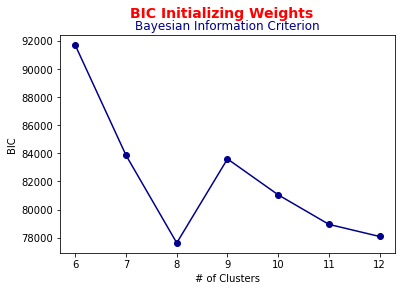

In [12]:
#Plot of the best BIC's vs the amount of clusters. 
plt.show()
silhouette_fig, ax = plt.subplots()
ax.plot(np.arange(6,13,1),all_bics,'-o',color='darkblue')
ax.set_xlabel('# of Clusters')
ax.set_ylabel('BIC')
ax.set_xticks(np.arange(6, 13, 1))
ax.set_title('Bayesian Information Criterion',color='darkblue')
silhouette_fig.suptitle('BIC Initializing Weights',color='red', weight = 'bold', size = 14)

In [13]:
mean_1=np.array([[0.08]*23,[-0.03]*23,[0.3]*23,[-0.2]*23,[-0.02]*23,[0]*23])
mean_2=np.zeros((6,23))
mean_3=np.ones((6,23))
mean_4=np.ones((6,23))*-1
mean_5=np.array([[0.5]*23,[-0.5]*23,[0.5]*23,[-0.5]*23,[0.5]*23,[-0.5]*23])
mean_6=np.array([[0.1]*23,[0.2]*23,[0.3]*23,[0.4]*23,[0.5]*23,[0.6]*23])
means_6cl=[]
means_6cl.append(mean_1)
means_6cl.append(mean_2)
means_6cl.append(mean_3)
means_6cl.append(mean_4)
means_6cl.append(mean_5)
means_6cl.append(mean_6)  #Means list with all the possible values. 

random_state=1
score=[]
n_comp=[]
bics=[]

for i in means_6cl:
    gmm=GaussianMixture(n_components=6,random_state=random_state,means_init=i,
        covariance_type='full',n_init=10)   #Apply GMM with 6 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score.append(sh_score)
    n_comp.append(i)
    bics.append(gmm.bic(X_scaled))

a=score.index(max(score))
b=bics.index(min(bics))

print('The score is', score[a],'\n'
     'The lowest BIC is:',bics[b],'with these centers',n_comp[b])   #Show the best solution

The score is 0.26309157201359235 
The lowest BIC is: 86116.46691727688 with these centers [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
mean7_1=np.array([[-0.03]*23,[-0.01]*23,[-0.1]*23,[0.3]*23,[0]*23,[0.2]*23,[-0.2]*23])
mean7_2=np.zeros((7,23))
mean7_3=np.ones((7,23))
mean7_4=np.ones((7,23))*-1
mean7_5=np.array([[0.5]*23,[-0.5]*23,[0.5]*23,[-0.5]*23,[0.5]*23,[-0.5]*23,[0.5]*23])
mean7_6=np.array([[0.1]*23,[0.2]*23,[0.3]*23,[0.4]*23,[0.5]*23,[0.6]*23,[0.7]*23])
means_7cl=[]
means_7cl.append(mean7_1)
means_7cl.append(mean7_2)
means_7cl.append(mean7_3)
means_7cl.append(mean7_4)
means_7cl.append(mean7_5)
means_7cl.append(mean7_6)   #Means list with all the possible values. 

random_state=1
score_7=[]
n_comp_7=[]
bics_7=[]

for i in means_7cl:
    gmm=GaussianMixture(n_components=7,random_state=random_state,means_init=i,
        covariance_type='full',n_init=10)   #Apply GMM with 7 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_7.append(sh_score)
    n_comp_7.append(i)
    bics_7.append(gmm.bic(X_scaled))

a7=score_7.index(max(score_7))
b7=bics_7.index(min(bics_7))

print('The score is', score_7[a7],'\n'
     'The lowest BIC is:',bics_7[b7],'with these centers',n_comp_7[b7])   #Show the best solution

The score is 0.36543158844880497 
The lowest BIC is: 84245.72625328609 with these centers [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
mean8_1=np.array([[0.28]*23,[-0.15]*23,[-0.17]*23,[0.25]*23,[0.01]*23,[-0.01]*23,[-0.2]*23,[-0.1]*23])
mean8_2=np.zeros((8,23))
mean8_3=np.ones((8,23))
mean8_4=np.ones((8,23))*-1
mean8_5=np.array([[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23])
mean8_6=np.array([[0.1]*23,[0.2]*23,[0.3]*23,[0.4]*23,[0.5]*23,[0.6]*23,[0.7]*23,[0.8]*23])
means_8cl=[]
means_8cl.append(mean8_1)
means_8cl.append(mean8_2)
means_8cl.append(mean8_3)
means_8cl.append(mean8_4)
means_8cl.append(mean8_5)
means_8cl.append(mean8_6)   #Means list with all the possible values. 

random_state=1
score_8=[]
n_comp_8=[]
bics_8=[]

for i in means_8cl:
    gmm=GaussianMixture(n_components=8,random_state=random_state,means_init=i,
        covariance_type='full',n_init=10)   #Apply GMM with 8 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_8.append(sh_score)
    n_comp_8.append(i)
    bics_8.append(gmm.bic(X_scaled))

a8=score_8.index(max(score_8))
b8=bics_8.index(min(bics_8))

print('The score is', score_8[a8],'\n'
     'The lowest BIC is:',bics_8[b8],'with these centers',n_comp_8[b8])   #Show the best solution

The score is 0.2604677124028972 
The lowest BIC is: 84831.47791703888 with these centers [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
mean9_1=np.array([[-0.25]*23,[-0.07]*23,[0.2]*23,[0.2]*23,[0.05]*23,[3.3]*23,[-0.1]*23,[0.15]*23,[0]*23])
mean9_2=np.zeros((9,23))
mean9_3=np.ones((9,23))
mean9_4=np.ones((9,23))*-1
mean9_5=np.array([[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23])
mean9_6=np.array([[0.1]*23,[0.2]*23,[0.3]*23,[0.4]*23,[0.5]*23,[0.6]*23,[0.7]*23,[0.8]*23,[0.9]*23])
means_9cl=[]
means_9cl.append(mean9_1)
means_9cl.append(mean9_2)
means_9cl.append(mean9_3)
means_9cl.append(mean9_4)
means_9cl.append(mean9_5)
means_9cl.append(mean9_6)   #Means list with all the possible values. 

random_state=1
score_9=[]
n_comp_9=[]
bics_9=[]

for i in means_9cl:
    gmm=GaussianMixture(n_components=9,random_state=random_state,means_init=i,
        covariance_type='full',n_init=10)   #Apply GMM with 9 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_9.append(sh_score)
    n_comp_9.append(i)
    bics_9.append(gmm.bic(X_scaled))

a9=score_9.index(max(score_9))
b9=bics_9.index(min(bics_9))

print('The score is', score_9[a9],'\n'
     'The lowest BIC is:',bics_9[b9],'with these centers',n_comp_9[b9])   #Show the best solution

The score is 0.2604677124028972 
The lowest BIC is: 85674.67013151757 with these centers [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
mean10_1=np.array([[0.15]*23,[-0.1]*23,[0]*23,[0]*23,[0.2]*23,[-0.2]*23,[0.35]*23,[-0.17]*23,[-0.1]*23,[0.05]*23])
mean10_2=np.zeros((10,23))
mean10_3=np.ones((10,23))
mean10_4=np.ones((10,23))*-1
mean10_5=np.array([[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23])
mean10_6=np.array([[0.1]*23,[0.2]*23,[0.3]*23,[0.4]*23,[0.5]*23,[0.6]*23,[0.7]*23,[0.8]*23,[0.9]*23,[1]*23])
means_10cl=[]
means_10cl.append(mean10_1)
means_10cl.append(mean10_2)
means_10cl.append(mean10_3)
means_10cl.append(mean10_4)
means_10cl.append(mean10_5)
means_10cl.append(mean10_6)   #Means list with all the possible values. 

random_state=1
score_10=[]
n_comp_10=[]
bics_10=[]

for i in means_10cl:
    gmm=GaussianMixture(n_components=10,random_state=random_state,means_init=i,
        covariance_type='full',n_init=10)   #Apply GMM with 10 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_10.append(sh_score)
    n_comp_10.append(i)
    bics_10.append(gmm.bic(X_scaled))

a10=score_10.index(max(score_10))
b10=bics_10.index(min(bics_10))

print('The score is', score_10[a10],'\n'
     'The lowest BIC is:',bics_10[b10],'with these centers',n_comp_10[b10])   #Show the best solution

The score is 0.2606887890232706 
The lowest BIC is: 82671.0311039428 with these centers [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
mean11_1=np.array([[0]*23,[-0.1]*23,[-0.2]*23,[-0.1]*23,[-0.15]*23,[0.3]*23,[0.02]*23,[-0.2]*23,[0.35]*23,[0.15]*23,[0.2]*23])
mean11_2=np.zeros((11,23))
mean11_3=np.ones((11,23))
mean11_4=np.ones((11,23))*-1
mean11_5=np.array([[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23])
mean11_6=np.array([[0.1]*23,[0.2]*23,[0.3]*23,[0.4]*23,[0.5]*23,[0.6]*23,[0.7]*23,[0.8]*23,[0.9]*23,[1]*23,[0.9]*23])
means_11cl=[]
means_11cl.append(mean11_1)
means_11cl.append(mean11_2)
means_11cl.append(mean11_3)
means_11cl.append(mean11_4)
means_11cl.append(mean11_5)
means_11cl.append(mean11_6)   #Means list with all the possible values. 

random_state=1
score_11=[]
n_comp_11=[]
bics_11=[]

for i in means_11cl:
    gmm=GaussianMixture(n_components=11,random_state=random_state,means_init=i,
        covariance_type='full',n_init=10)   #Apply GMM with 11 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_11.append(sh_score)
    n_comp_11.append(i)
    bics_11.append(gmm.bic(X_scaled))

a11=score_11.index(max(score_11))
b11=bics_11.index(min(bics_11))

print('The score is', score_11[a11],'\n'
     'The lowest BIC is:',bics_11[b11],'with these centers',n_comp_11[b11])   #Show the best solution


The score is 0.28379038174458454 
The lowest BIC is: 83012.62823894636 with these centers [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
mean12_1=np.array([[0]*23,[0]*23,[-0.2]*23,[0.25]*23,[-0.1]*23,[0.3]*23,[0]*23,[-0.25]*23,[0.35]*23,[0.15]*23,[0.15]*23,[-0.1]*23])
mean12_2=np.zeros((12,23))
mean12_3=np.ones((12,23))
mean12_4=np.ones((12,23))*-1
mean12_5=np.array([[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23,[0.1]*23,[-0.1]*23])
mean12_6=np.array([[0.1]*23,[0.2]*23,[0.3]*23,[0.4]*23,[0.5]*23,[0.6]*23,[0.7]*23,[0.8]*23,[0.9]*23,[1]*23,[0.9]*23,[0.8]*23])
means_12cl=[]
means_12cl.append(mean12_1)
means_12cl.append(mean12_2)
means_12cl.append(mean12_3)
means_12cl.append(mean12_4)
means_12cl.append(mean12_5)
means_12cl.append(mean12_6)   #Means list with all the possible values. 

random_state=1
score_12=[]
n_comp_12=[]
bics_12=[]

for i in means_12cl:
    gmm=GaussianMixture(n_components=12,random_state=random_state,means_init=i,
        covariance_type='full',n_init=10)   #Apply GMM with 12 clusters
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_12.append(sh_score)
    n_comp_12.append(i)
    bics_12.append(gmm.bic(X_scaled))

a12=score_12.index(max(score_12))
b12=bics_12.index(min(bics_12))

print('The score is', score_12[a12],'\n'
     'The lowest BIC is:',bics_12[b12],'with these centers',n_comp_12[b12])   #Show the best solution

The score is 0.2604677124028972 
The lowest BIC is: 88709.62462618502 with these centers [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
#List with all the best BIC's for each initialization
all_bics=[bics[b],bics_7[b7],bics_8[b8],bics_9[b9],bics_10[b10],bics_11[b11],bics_12[b12]]

Text(0.5, 0.98, 'BIC Initializing Means')

<Figure size 432x288 with 0 Axes>

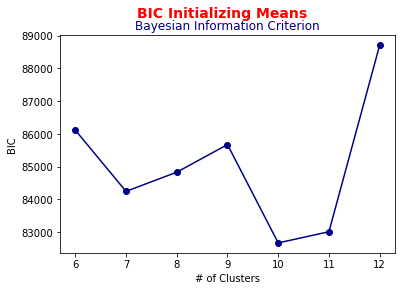

In [21]:
#Plot of the best BIC's vs the amount of clusters. 
plt.show()
plt.suptitle('BIC Initializing Means',color='red')
silhouette_fig, ax = plt.subplots()
ax.plot(np.arange(6,13,1),all_bics,'-o',color='darkblue')
ax.set_xlabel('# of Clusters')
ax.set_ylabel('BIC')
ax.set_xticks(np.arange(6, 13, 1))
ax.set_title('Bayesian Information Criterion',color='darkblue')
silhouette_fig.suptitle('BIC Initializing Means',color='red', weight = 'bold', size = 14)

In [22]:
n_clusters=[6,7,8,9,10,11,12,13,14,15,16,17,18]
random_state=1
score_r=[]
n_comp_r=[]
bics_r=[]
#loop varying the number of cluster between 6 and 18 and getting at the end the lower BIC. 
for i in n_clusters:
    gmm_r=GaussianMixture(n_components=i,random_state=random_state,init_params='random',
        covariance_type='full',n_init=10)
    em_labels_r=gmm_r.fit_predict(X_scaled)
    sh_score_r = silhouette_score(X_scaled, em_labels_r)
    score_r.append(sh_score_r)
    n_comp_r.append(i)
    bics_r.append(gmm_r.bic(X_scaled))

a_all_r=score_r.index(max(score_r))
b_all_r=bics_r.index(min(bics_r))

print('The lowest BIC is:',bics_r[b_all_r], 'and the best score is:',score_r[a_all_r])

The lowest BIC is: 79975.33553452103 and the best score is: 0.09984381931907463


Text(0.5, 0.98, 'BIC Initializing Randomly')

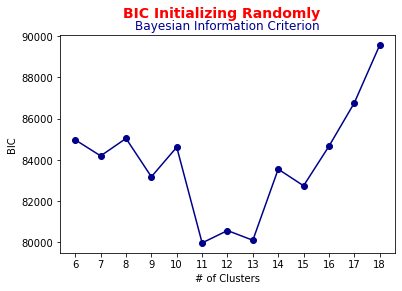

In [23]:
#Plot of the best BIC's vs the amount of clusters. 
plt.show()
silhouette_fig, ax = plt.subplots()
ax.plot(np.arange(6,19,1),bics_r,'-o',color='darkblue')
ax.set_xlabel('# of Clusters')
ax.set_ylabel('BIC')
ax.set_xticks(np.arange(6, 19, 1))
ax.set_title('Bayesian Information Criterion',color='darkblue')
silhouette_fig.suptitle('BIC Initializing Randomly',color='red', weight = 'bold', size = 14)

In [24]:
n_clusters=[6,7,8,9,10,11,12,13,14,15,16,17,18]
score_n=[]
n_comp_n=[]
bics_n=[]

#loop varying the number of cluster between 6 and 18 and getting at the end the lower BIC. 
for i in n_clusters:
    gmm=GaussianMixture(n_components=i,random_state=random_state,init_params='kmeans',
        covariance_type='full',n_init=10)
    em_labels=gmm.fit_predict(X_scaled)
    sh_score = silhouette_score(X_scaled, em_labels)
    score_n.append(sh_score)
    n_comp_n.append(i)
    bics_n.append(gmm.bic(X_scaled))

a_all=score_n.index(max(score_n))
b_all=bics_n.index(min(bics_n))

print('The lowest BIC is:',bics_n[b_all], 'and the best score is:',score_n[a_all])

The lowest BIC is: 77612.23277628879 and the best score is: 0.09361003795162583


Text(0.5, 0.98, 'BIC Initializing with K-MEANS')

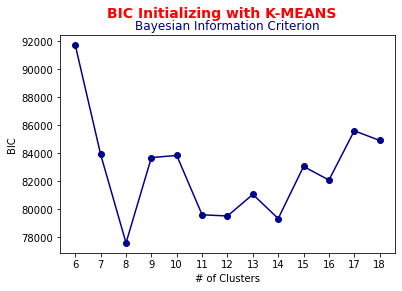

In [25]:
#Plot of the best BIC's vs the amount of clusters. 
plt.show()
silhouette_fig, ax = plt.subplots()
ax.plot(np.arange(6,19,1),bics_n,'-o',color='darkblue')
ax.set_xlabel('# of Clusters')
ax.set_ylabel('BIC')
ax.set_xticks(np.arange(6, 19, 1))
ax.set_title('Bayesian Information Criterion',color='darkblue')
silhouette_fig.suptitle('BIC Initializing with K-MEANS',color='red', weight = 'bold', size = 14)

# The best solution was obtained initializing the parameters with K - MEANS ++ and choosing 8 clusters. With that in mind, the implementation was made with this exact configuration. 

# At the end, the probability of samples being in each cluster were taken. 

In [26]:
gmm_8=GaussianMixture(n_components=8,random_state=1,init_params='kmeans',covariance_type='full',n_init=10)
gmm_8.fit(X_scaled)
proba_labels_8=gmm_8.predict_proba(X_scaled)
labels_8=gmm_8.predict(X_scaled)
proba_labels_8=np.round(proba_labels_8,3)

In [27]:
labels_df=pd.DataFrame(proba_labels_8,columns=['Prob. cluster 0','Prob. cluster 1','Prob. cluster 2','Prob. cluster 3',
                                                'Prob. cluster 4','Prob. cluster 5','Prob. cluster 6','Prob. cluster 7'])
labels_df['labels']=labels_8   #DataFrame with the probability labels for each sample. 